PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS
    
    Data Description:
    
    month - month of the year: 'jan' to 'dec'
    day - day of the week: 'mon' to 'sun'
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    Size_Categorie - the burned area of the forest ( Small , Large)

### Importing the required Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

import keras, tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam

# importing warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
# Reading the dataset
forest = pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# to check the null values of the data
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
print("Dimensions -",forest.shape)
print("Column names -",forest.columns)

Dimensions - (517, 31)
Column names - Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')


### Visualizations

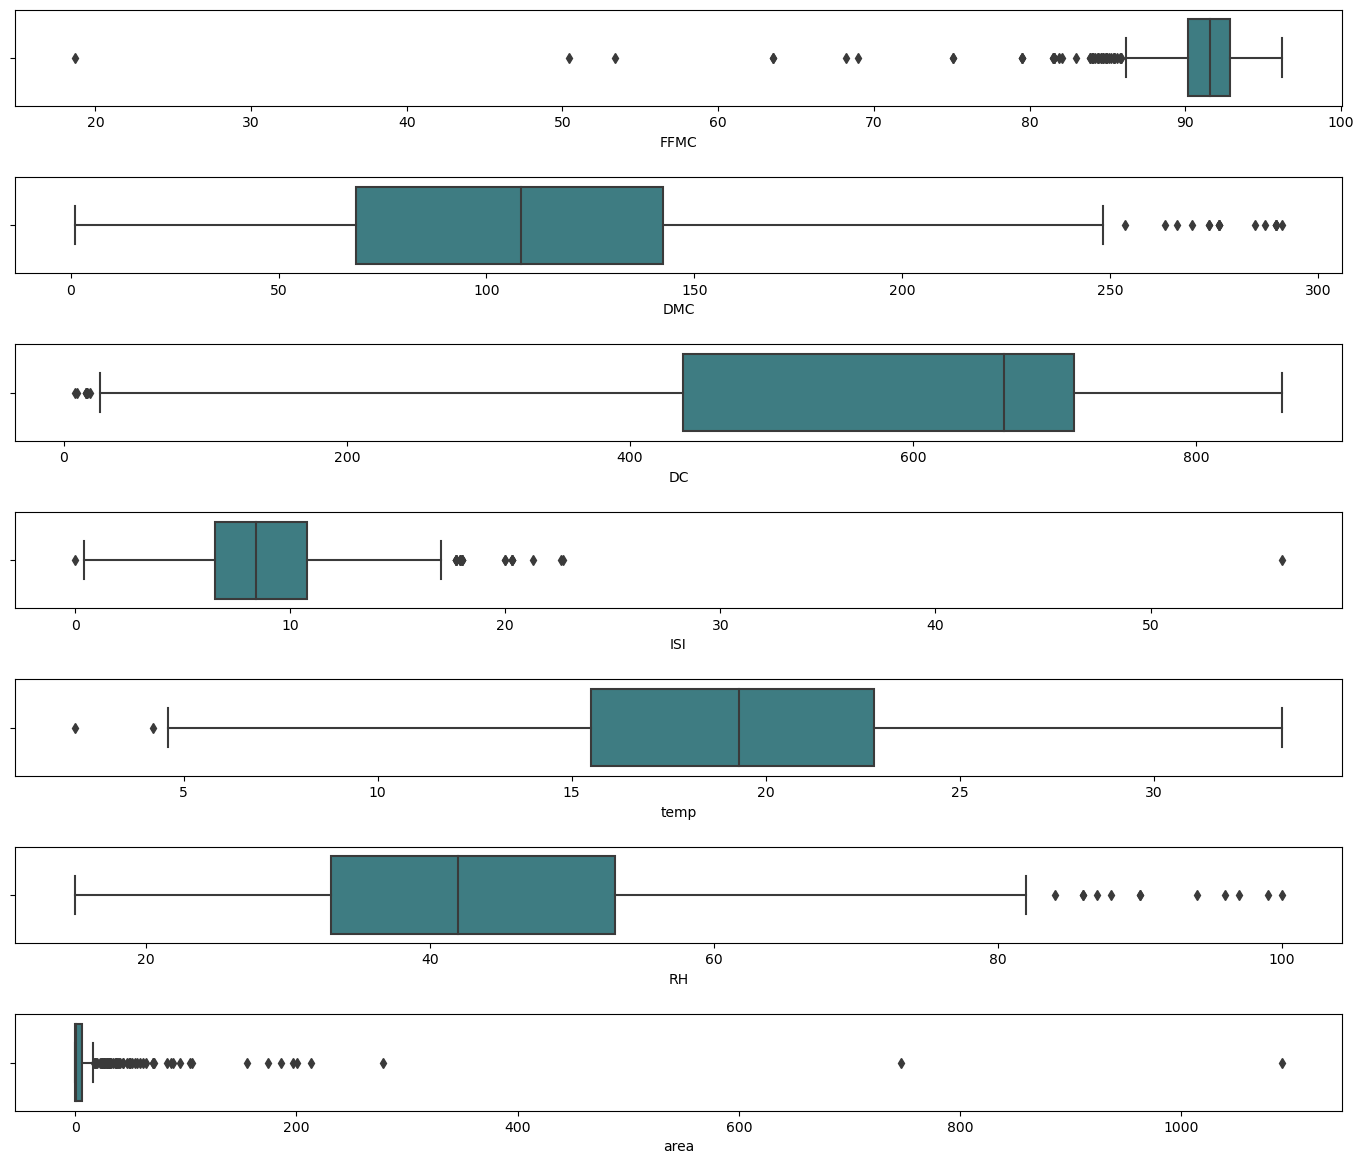

In [6]:
# checking for the Outliers in the variables if present
outlier=forest.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Skewness: 12.846933533934868
Kurtosis: 194.1407210942299


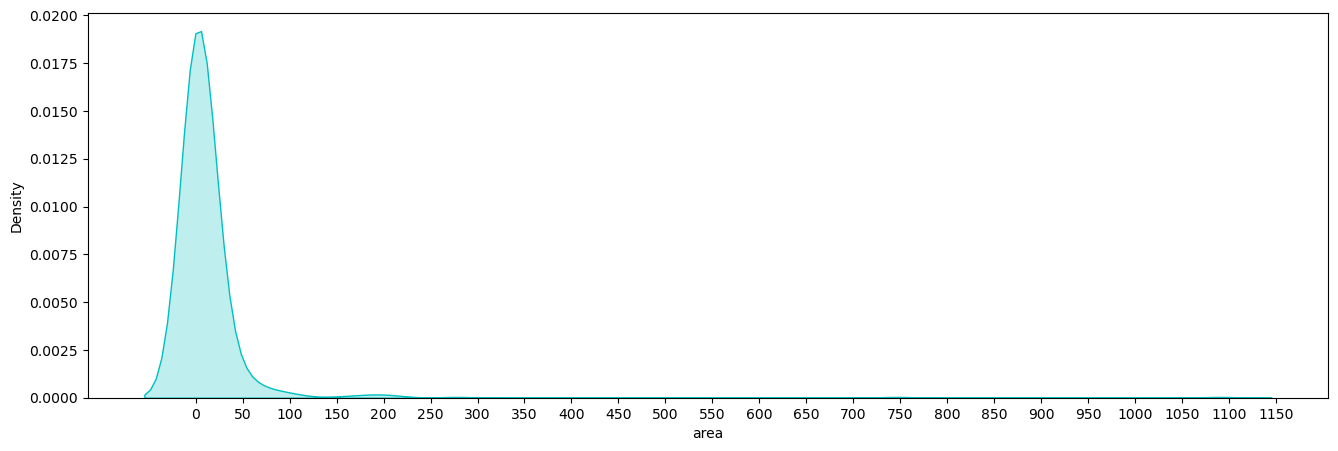

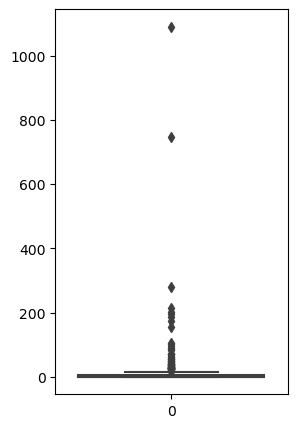

In [7]:
# Visualizing the distribution of the 'area'
plt.figure(figsize=(16,5))
print("Skewness: {}".format(forest['area'].skew()))
print("Kurtosis: {}".format(forest['area'].kurtosis()))
ax = sns.kdeplot(forest['area'],shade=True,color='c')
plt.xticks([i for i in range(0,1200,50)])
plt.show()
plt.figure(figsize=(3,5))
ax = sns.boxplot(forest['area'])

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category')

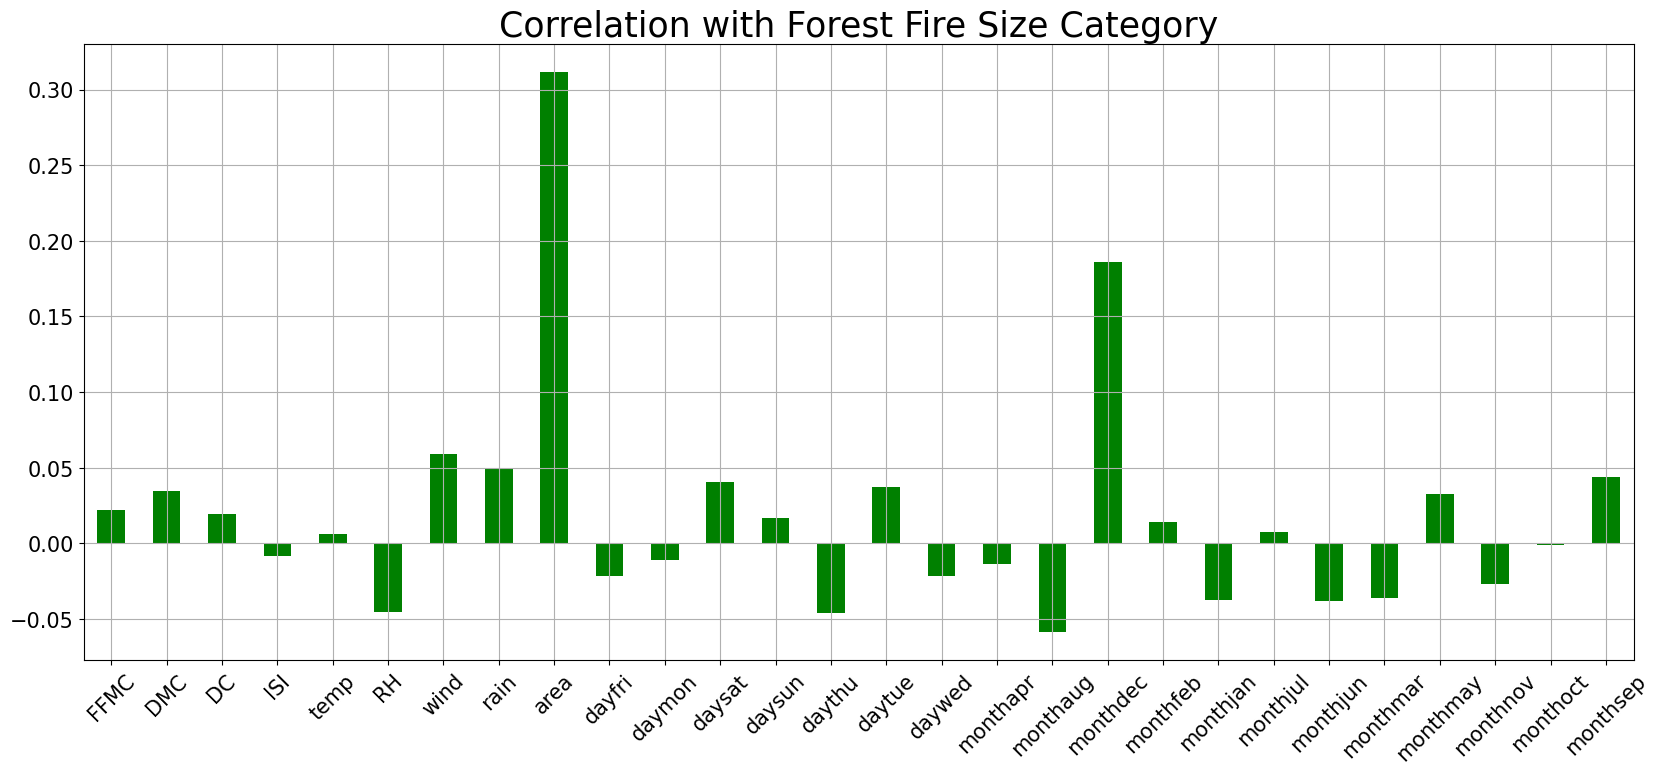

In [8]:
df=forest.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = forest.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 8), fontsize = 15, color = 'green', rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category',
          horizontalalignment="center", fontstyle = "normal", 
          fontsize = "25")

### Data Preprocessing 

In [9]:
# to check the dimensions of duplicates in the data
print(forest[forest.duplicated()].shape)

# to get the duplicate values from the data
forest[forest.duplicated()]

(8, 31)


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
# Removing the duplicates 
forest1 = forest.drop_duplicates()
forest1.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
54,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
55,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [11]:
# Resetting the index
forest1 = forest1.reset_index()
forest1 = forest1.drop(columns="index")
forest1.iloc[50:55]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
50,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,...,0,0,0,0,0,0,0,0,1,small
51,aug,sun,90.2,99.6,631.2,6.3,21.5,34,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,thu,91.7,114.3,661.3,6.3,17.6,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
54,sep,thu,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small


In [12]:
# label encoding for the 'size_category' column
forest1[['size_category']] = forest1[['size_category']].astype('category')
forest2 = forest1
forest2['size_category'] = forest2['size_category'].cat.codes
forest2 = forest2.drop(columns=['month','day'])
forest2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


### Train and Test Split
    Splitting the data into Train and Test data

In [13]:
X = forest2.drop(['size_category'],axis=1)
y = forest2[['size_category']]

# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Standardization

In [14]:
# standardizing the traing data using StandardScaler function
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
print('Standardized X_train Data:\n',X_train_std)
print('\n\nStandardized X_test Data:\n',X_test_std)

Standardized X_train Data:
 [[-0.93309521 -1.37294834 -0.80675171 ...  0.         -0.16104844
  -0.69522179]
 [ 0.5363445  -0.13170258  0.0144792  ...  0.         -0.16104844
  -0.69522179]
 [ 0.12915036  0.518012    0.22367611 ...  0.         -0.16104844
  -0.69522179]
 ...
 [ 0.43011994  0.7588266   0.49100601 ...  0.         -0.16104844
  -0.69522179]
 [ 0.48323222  0.56649816  0.71494086 ...  0.         -0.16104844
   1.4383899 ]
 [ 0.07603808  0.35477525  1.08625513 ...  0.         -0.16104844
   1.4383899 ]]


Standardized X_test Data:
 [[ 0.22663336 -1.09256162 -1.83129721 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [-0.05573557 -0.15278764  0.31614152 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [ 0.0760366   0.24344935  0.53189981 ... -0.08111071 -0.20203051
   1.31610898]
 ...
 [ 0.60312525 -0.12774664 -0.49461024 ... -0.08111071 -0.20203051
  -0.7598155 ]
 [ 0.39605471 -0.93495062  0.55257827 ... -0.08111071  4.94974747
  -0.7598155 ]
 [ 0.18898417  0.29647735  1.00243235 ...

### Tuning of Hyperparameters

    Batch Size and Epochs

In [15]:
# Creating the model
def create_model():
    model1 = Sequential()
    model1.add(Dense(128, input_dim=28, activation='relu'))
    model1.add(Dense(64, activation='relu'))
    model1.add(Dense(32, activation="relu"))
    model1.add(Dense(units=1, activation="sigmoid"))
    
    adam = Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
    return model1

model1 = KerasClassifier(build_fn=create_model, verbose=0)
# Defining the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)
# Building and fitting the GridSearchCV
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result1 = grid.fit(X_test_std, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.806 total time=   1.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.742 total time=   1.1s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.806 total time=   1.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.800 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.867 total time=   1.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.806 total time=   2.0s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.767 total time=   1.8s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.800 total time=   1.7s


In [16]:
# Summarizing the results
print('Best {}, using {}'.format(grid_result1.best_score_, grid_result1.best_params_))
means  = grid_result1.cv_results_["mean_test_score"]
stds   = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means, stds,params):
    print("{}, {} with {}".format(mean, stdev, param))

Best 0.8305376344086023, using {'batch_size': 10, 'epochs': 100}
0.8043010752688172, 0.03951375166574057 with {'batch_size': 10, 'epochs': 10}
0.8172043010752688, 0.032157549492505384 with {'batch_size': 10, 'epochs': 50}
0.8305376344086023, 0.08201023880760065 with {'batch_size': 10, 'epochs': 100}
0.7711827956989247, 0.058066109098021436 with {'batch_size': 20, 'epochs': 10}
0.8240860215053762, 0.08289367195971854 with {'batch_size': 20, 'epochs': 50}
0.790752688172043, 0.07855087099470671 with {'batch_size': 20, 'epochs': 100}
0.7126881720430107, 0.06125975468629273 with {'batch_size': 40, 'epochs': 10}
0.8043010752688172, 0.052743004165293435 with {'batch_size': 40, 'epochs': 50}
0.8036559139784945, 0.054978106617012384 with {'batch_size': 40, 'epochs': 100}


    Learning Rate, Number of Layers and Neurons

In [17]:
from keras import layers
def build_model(par):
    model2 = Sequential()
    for i in range(par.Int('num_layers', 2, 20)):
        model2.add(layers.Dense(units=par.Int('units_' + str(i), min_value=32,
                                             max_value=100, step=32), activation='relu'))
    model2.add(layers.Dense(1, activation='sigmoid'))
    # Compiling the model
    model2.compile(optimizer=keras.optimizers.Adam(par.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                   loss='binary_crossentropy', metrics=['accuracy'])
    return model2

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3,
                     directory='Project', project_name='Forest Fire')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [18]:
tuner.search(X_train_std, y_train,epochs=100,validation_data=(X_test_std, y_test))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.8736383517583212

Best val_accuracy So Far: 0.8779956499735514
Total elapsed time: 00h 02m 17s
INFO:tensorflow:Oracle triggered exit


In [19]:
tuner.results_summary()

Results summary
Results in Project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 10
units_0: 96
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 96
units_4: 32
units_5: 64
units_6: 32
units_7: 96
units_8: 32
units_9: 64
units_10: 64
units_11: 64
units_12: 64
units_13: 96
units_14: 32
Score: 0.8779956499735514

Trial 0 summary
Hyperparameters:
num_layers: 15
units_0: 32
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.8736383517583212

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 32
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 96
units_7: 32
units_8: 32
units_9: 64
units_10: 96
units_11: 96
units_12: 32
units_13: 96
units_14: 32
Score: 0.8736383517583212

Trial 1 summary
Hyperparameters:
num_laye

## Building the model Using Neural Networks

In [20]:
def BestParams(X_train, y_train, X_test, y_test):
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            # create ANN model
            model = Sequential()
            model.add(Dense(units=128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=64, kernel_initializer='normal', activation='tanh'))
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
            
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            # Fitting the ANN to the Training set
            model_trained = model.fit(X_train, y_train, batch_size=batch_trial, epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:', epochs_trial, 'Accuracy:', Accuracy_train)

# Calling the function
BestParams(X_train, y_train, X_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8455055952072144
batch_size: 5 - epochs: 10 Accuracy: 0.9606741666793823
batch_size: 5 - epochs: 50 Accuracy: 0.983146071434021
batch_size: 5 - epochs: 100 Accuracy: 0.9803370833396912
batch_size: 10 - epochs: 5 Accuracy: 0.8567415475845337
batch_size: 10 - epochs: 10 Accuracy: 0.949438214302063
batch_size: 10 - epochs: 50 Accuracy: 0.966292142868042
batch_size: 10 - epochs: 100 Accuracy: 0.9915730357170105
batch_size: 15 - epochs: 5 Accuracy: 0.8651685118675232
batch_size: 15 - epochs: 10 Accuracy: 0.9269663095474243
batch_size: 15 - epochs: 50 Accuracy: 0.9887640476226807
batch_size: 15 - epochs: 100 Accuracy: 0.9915730357170105
batch_size: 20 - epochs: 5 Accuracy: 0.8455055952072144
batch_size: 20 - epochs: 10 Accuracy: 0.915730357170105
batch_size: 20 - epochs: 50 Accuracy: 0.9887640476226807
batch_size: 20 - epochs: 100 Accuracy: 0.9971910119056702


### Training the model with the best parameters

In [21]:
# creating the model
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.5998 - accuracy: 0.7227 - val_loss: 0.5234 - val_accuracy: 0.7797
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.7311 - val_loss: 0.5268 - val_accuracy: 0.7881
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.7437 - val_loss: 0.4861 - val_accuracy: 0.7966
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7521 - val_loss: 0.4486 - val_accuracy: 0.8305
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4559 - accuracy: 0.7941 - val_loss: 0.3796 - val_accuracy: 0.8390
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8361 - val_loss: 0.3569 - val_accuracy: 0.8729
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8571 - val_loss: 0.3096 - val_accuracy: 0.8729
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9832 - val_loss: 0.0668 - val_accuracy: 0.9831
Epoch 60/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9958 - val_loss: 0.0633 - val_accuracy: 0.9746
Epoch 61/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 0.0624 - val_accuracy: 0.9831
Epoch 62/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9831
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0684 - val_accuracy: 0.9831
Epoch 64/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9746
Epoch 65/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9874 - val_loss: 0.0866 - val_accuracy: 0.9576
Epoch 

### Model Evaluation Train and Test Error

In [22]:
# to evaluate the keras model and get the accuracy 
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9944
accuracy: 99.44%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


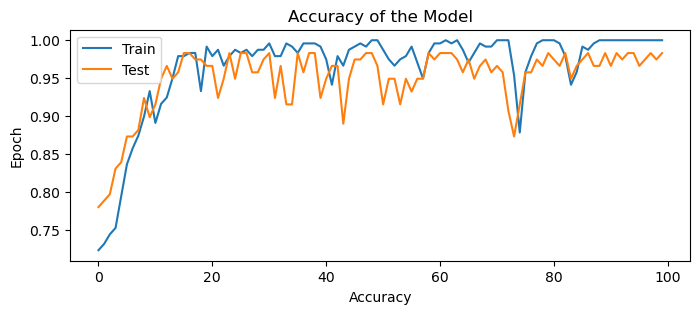

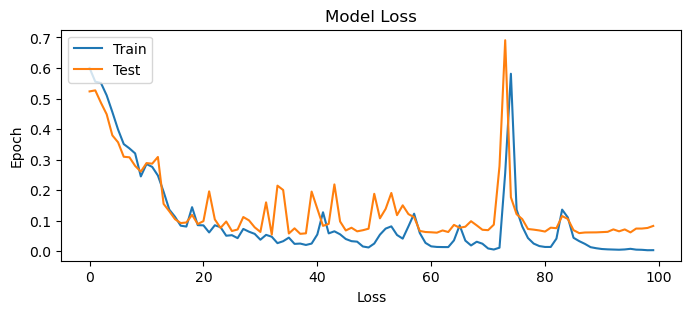

In [23]:
# Plotting 
#list all the data in history
print(history.history.keys())
#summarizing history for accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy of the Model")
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'],loc = 'upper left')
plt.show()

#summarizing history for loss
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

## Predictions 
    Predicting the Burned Area of Forest Fires

In [24]:
# generating predictions for test data
predict_test = model.predict(X_test) 
test_pred = pd.DataFrame()
test_pred['Actual Test'] = y_test.size_category
test_pred['Test Probability'] = predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0
# converting the probability of target variable to binary class of test data
test_pred['Predicted Test'] = test_pred['Test Probability'].apply(probToBinary)
print(test_pred.shape)
test_pred.head(10)

5/5 [==============================] - 0s 2ms/step
(153, 3)


,Actual Test,Test Probability,Predicted Test
16,1,0.999627,1
80,1,0.998332,1
185,0,0.034765,0
327,0,0.004278,0
419,1,0.998195,1
499,1,0.998204,1
126,1,0.998280,1
164,1,0.998169,1
333,0,0.000489,0
130,1,0.999659,1


In [25]:
# generating predictions for train data
predict_train = model.predict(X_train) 
train_pred = pd.DataFrame()
train_pred['Actual Train'] = y_train.size_category
train_pred['Train Probability'] = predict_train
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0
# converting the probability of target variable to binary class of test data
train_pred['Predicted Train'] = train_pred['Train Probability'].apply(probToBinary)
print(train_pred.shape)
train_pred.head(10)

12/12 [==============================] - 0s 1ms/step
(356, 3)


,Actual Train,Train Probability,Predicted Train
278,0,0.000490,0
262,1,0.998455,1
98,1,0.998299,1
268,0,0.011997,0
299,1,0.999578,1
466,1,0.999314,1
376,0,0.008716,0
401,1,0.998190,1
146,1,0.998211,1
180,0,0.006840,0


In [26]:
# printing the Accuracy scores of training and testong datasets
predict_test = model.predict(X_test) 
predict_train = model.predict(X_train)
print('Training set Accuracy : {:.2f}%'.format(accuracy_score(train_pred['Actual Train'], 
                                                              train_pred['Predicted Train'])*100))
print('Test set Accuracy : {:.2f}%'.format(accuracy_score(test_pred['Actual Test'], 
                                                          test_pred['Predicted Test'])*100))

12/12 [==============================] - 0s 372us/step
Training set Accuracy : 99.44%
Test set Accuracy : 97.39%


In [27]:
# printing the Confusion Matrices of train and test datasets
print("Confusion Matrix for Test Data : \n", confusion_matrix(test_pred['Actual Test'],
                                                              test_pred['Predicted Test']))
print("\n\nConfusion Matrix for Train Data : \n", confusion_matrix(train_pred['Actual Train'],
                                                                   train_pred['Predicted Train']))

Confusion Matrix for Test Data : 
 [[ 45   2]
 [  2 104]]


Confusion Matrix for Train Data : 
 [[ 89   2]
 [  0 265]]
